In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"..\data\loja_pedidos.csv")
df

,order_id,item_name,choice_description,quantity,item_price,order_date
0,1098,Boné,[Sem estampa],4,$98.21,2024-06-04
1,1017,Pulseira,[Simples],4,,2024-02-14
2,1055,Blusa,"[Azul, M]",3,$59.88,2024-05-03
3,1068,Broche,[Simples],2,$62.30,2024-05-12
4,1059,Camiseta,"[Azul, M]",2,$82.68,2024-02-24
...,...,...,...,...,...,...
195,1061,Boné,[Simples],1,$81.46,2024-03-30
196,1010,Ecobag,"[Preto, G]",3,$58.53,2024-03-26
197,1097,Chaveiro,[Estampada],2,$22.11,2024-03-07
198,1090,Pulseira,[Sem estampa],5,$90.90,2024-01-31


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            200 non-null    int64 
 1   item_name           200 non-null    object
 2   choice_description  190 non-null    object
 3   quantity            200 non-null    int64 
 4   item_price          200 non-null    object
 5   order_date          200 non-null    object
dtypes: int64(2), object(4)
memory usage: 9.5+ KB


In [4]:
df.head(5)

,order_id,item_name,choice_description,quantity,item_price,order_date
0,1098,Boné,[Sem estampa],4,$98.21,2024-06-04
1,1017,Pulseira,[Simples],4,,2024-02-14
2,1055,Blusa,"[Azul, M]",3,$59.88,2024-05-03
3,1068,Broche,[Simples],2,$62.30,2024-05-12
4,1059,Camiseta,"[Azul, M]",2,$82.68,2024-02-24


ENCONTRAR VALORES NULOS NO DATAFRAME

In [5]:
(df.isnull() | (df == "")).sum()


order_id               0
item_name              0
choice_description    10
quantity               0
item_price             0
order_date             0
dtype: int64

In [6]:
df["choice_description"] = df["choice_description"].fillna("Sem descrição")
df.head(20)

,order_id,item_name,choice_description,quantity,item_price,order_date
0,1098,Boné,[Sem estampa],4,$98.21,2024-06-04
1,1017,Pulseira,[Simples],4,,2024-02-14
2,1055,Blusa,"[Azul, M]",3,$59.88,2024-05-03
3,1068,Broche,[Simples],2,$62.30,2024-05-12
4,1059,Camiseta,"[Azul, M]",2,$82.68,2024-02-24
5,1000,Mochila,"[Azul, M]",5,$88.38,2024-02-01
6,1021,Boné,[Simples],5,$66.46,2024-02-09
7,1020,Camiseta,[Edição limitada],4,$36.04,2024-02-10
8,1049,Chaveiro,[Sem estampa],4,$92.40,2024-01-24
9,1012,Corrente,[Estampada],5,$92.13,2024-02-15


In [7]:
df["item_price"] = (
    df["item_price"]
    .astype(str)                    # Transforma tudo em string ex: Nan, None
    .str.replace("$", "", regex=False)  # remove o símbolo $, regex para indicar o valor literal de $
    .str.strip()                    # tira espaços antes e depois
)

# agora converte pra float, ignorando erros
#errors significa que se um valor não puder ser convertido ele vira Nan
df["item_price"] = pd.to_numeric(df["item_price"], errors="coerce")


CONFERE SE AINDA TEM VALORES NULOS

In [8]:

df["item_price"].isnull().sum()  # vê se ainda tem valores problemáticos

df[df["item_price"].isnull()]






,order_id,item_name,choice_description,quantity,item_price,order_date
1,1017,Pulseira,[Simples],4,NaN,2024-02-14
16,1011,Camiseta,[Edição limitada],5,NaN,2024-01-07
34,1084,Corrente,"[Branco, P]",3,NaN,2024-02-28
38,1053,Corrente,"[Cinza, G]",1,NaN,2024-02-19
45,1059,Mochila,"[Azul, M]",3,NaN,2024-01-17
92,1080,Corrente,[Simples],4,NaN,2024-06-02
116,1014,Broche,Sem descrição,4,NaN,2024-06-17
118,1021,Camiseta,"[Preto, G]",4,NaN,2024-03-17
136,1037,Corrente,[Com logo],3,NaN,2024-03-25
181,1099,Corrente,"[Preto, G]",3,NaN,2024-05-11


PREENCHE VALORES NULOS COM OS PREÇOS FALTANTES

In [9]:

df["item_price"] = df.groupby("item_name")["item_price"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.mean())
)
df["item_price"] 

0      98.21
1      26.24
2      59.88
3      62.30
4      82.68
       ...  
195    81.46
196    58.53
197    22.11
198    90.90
199    60.49
Name: item_price, Length: 200, dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            200 non-null    int64  
 1   item_name           200 non-null    object 
 2   choice_description  200 non-null    object 
 3   quantity            200 non-null    int64  
 4   item_price          200 non-null    float64
 5   order_date          200 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


QUANTOS PEDIDOS UNICOS FORAM FEITOS?

In [11]:
total_orders = len(set(df["order_id"]))

print("Total de pedidos:", total_orders)

Total de pedidos: 87


QUANTOS ITENS DIFERENTES FORAM VENDIDOS?

In [12]:
total_items = len(set(df["item_name"]))
print("Total de itens:", total_items)

Total de itens: 10


QUAL O ITEM MAIS VENDIDO DE ACORDO COM A QUANTIDADE?

In [13]:
best_item_seller = df.groupby("item_name").sum()["quantity"]
print("Item mais vendido:", best_item_seller.idxmax())

Item mais vendido: Broche


QUAL O ITEM DE MAIOR RECEITA?

In [14]:
df["revenue"] = df["item_price"] * df["quantity"]
best_revenue= df.groupby("item_name").sum()["revenue"].sort_values(ascending=False)
best_revenue.head(1)

item_name
Broche    3912.45
Name: revenue, dtype: float64

GRAFICO COM OS 10 ITENS MAIS VENDIDOS

<Axes: title={'center': '10 mais vendidos'}, ylabel='item_name'>

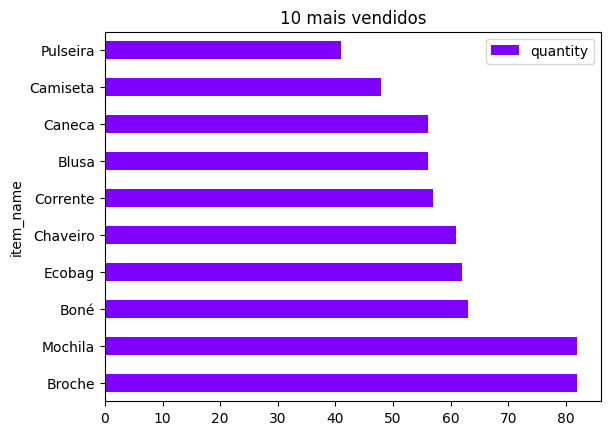

In [15]:
best_sellers = df.groupby("item_name").sum()[["quantity"]].sort_values("quantity", ascending=False)
best_sellers.head(10).plot(kind="barh", title="10 mais vendidos", colormap="rainbow")

GRÁFICO DE PIZZA

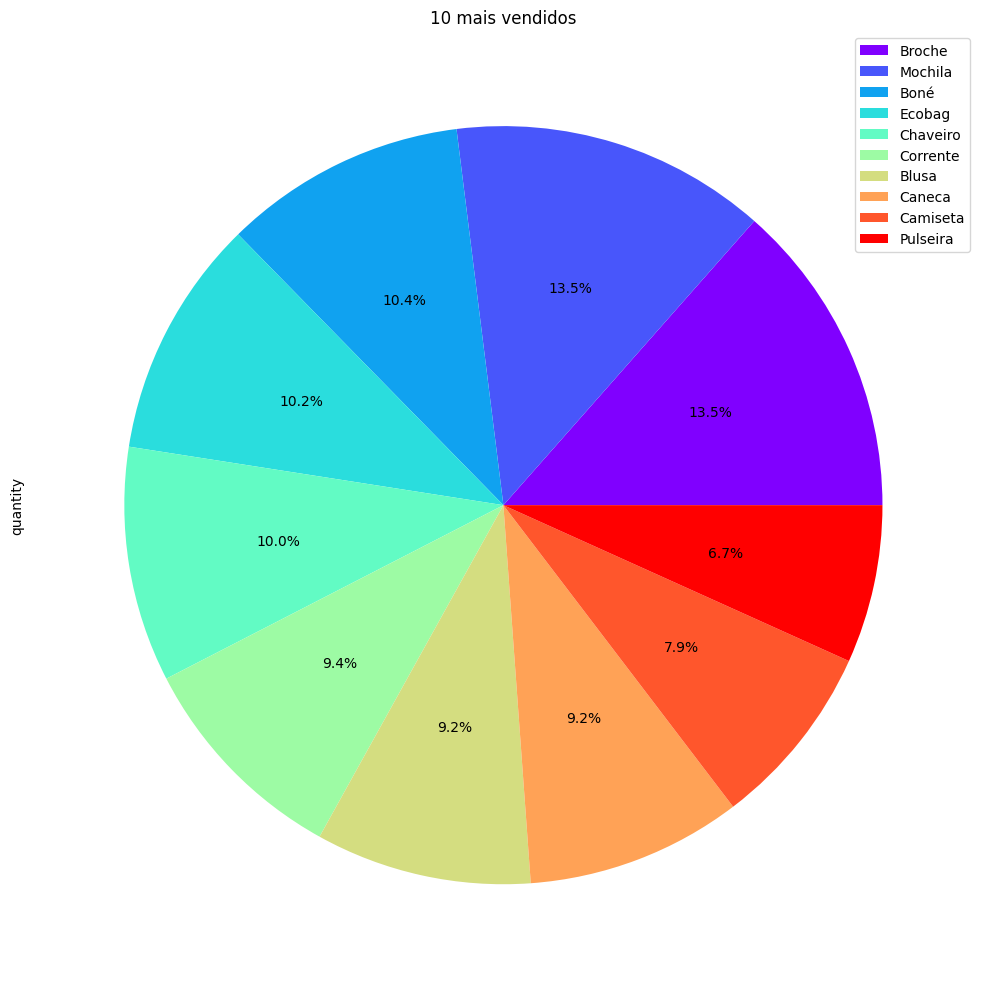

In [16]:
ax = best_sellers.head(10).plot(
    kind="pie", 
    y="quantity", 
    title="10 mais vendidos", 
    figsize=(10,10),
    colormap="rainbow",
    autopct="%1.1f%%",  # mostra as porcentagens
    legend=True,         
    labels=None
)

# Salvar a figura
fig = ax.get_figure()
fig.tight_layout()  # ajustar layout para não cortar o título
fig.savefig("../results/best_sellers_pie.png")


GRAFICO DE LINHA

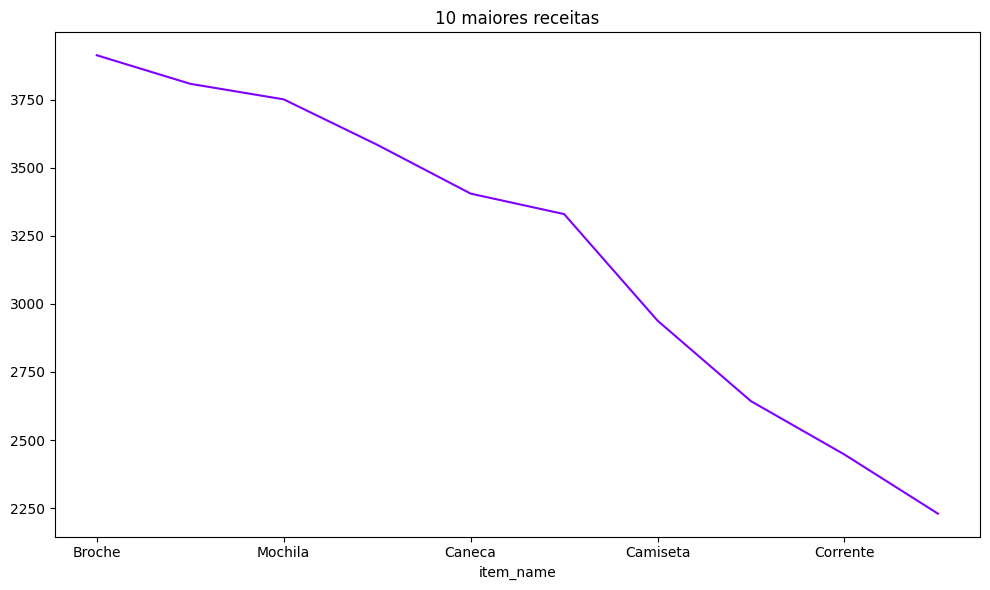

In [17]:
ax = best_revenue.head(10).plot(
    kind="line",
    title="10 maiores receitas",
    colormap="rainbow",
    figsize=(10,6) 
)

# Salvar a figura
fig = ax.get_figure()
fig.tight_layout()  # ajusta layout para não cortar título ou rótulos
fig.savefig("../results/best_revenue_line.png")


QUAL A MEDIA DE RECEITA POR PEDIDO?

In [18]:
revenue_order_mean = df.groupby("order_id").sum()["revenue"].mean()
print("A media de receita por pedido é:", round(revenue_order_mean, 2))
#round delimita as casas decimais para 2

A media de receita por pedido é: 368.34


In [19]:
df["order_date"] = pd.to_datetime(df["order_date"])

best_day_seller = df.groupby("order_date")["revenue"].sum()

data_top = best_day_seller.idxmax() # pega a data com maior receita
valor_top = best_day_seller.loc[data_top]  # pega o valor dessa data

print("O dia com mais faturamento foi:",data_top.strftime("%d/%m/%y"))



print("com faturamento de: R$", valor_top)

O dia com mais faturamento foi: 31/01/24
com faturamento de: R$ 941.48


ITEM MAIS VENDIDO POR DESCRIÇÃO

In [20]:
# Garantindo que vamos somar apenas a coluna 'quantity'
best_item_choice_description = (
    df.groupby(["choice_description", "item_name"])["quantity"]
      .sum()
)

# Pegando a combinação com maior quantidade
top_item = best_item_choice_description.idxmax()
top_item_quantity = best_item_choice_description.max()

# Mostrando o resultado
print(
    f"Descrição: {top_item[0]}\n"
    f"Item: {top_item[1]}\n"
    f"Quantidade: {int(top_item_quantity)}"
)


Descrição: [Simples]
Item: Boné
Quantidade: 20


PEDIDO COM MAIOR VALOR TOTAL

In [21]:
total_order_value = df.groupby("order_id")["revenue"].sum()
top_order = total_order_value.idxmax()
top_order_revenue = total_order_value.loc[top_order]


print(f"O pedido com maior valor é o número: {top_order},\n com faturamento de: R${round(top_order_revenue, 2)}")


O pedido com maior valor é o número: 1090,
 com faturamento de: R$1503.11


In [22]:
df["order_date"] = pd.to_datetime(df["order_date"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            200 non-null    int64         
 1   item_name           200 non-null    object        
 2   choice_description  200 non-null    object        
 3   quantity            200 non-null    int64         
 4   item_price          200 non-null    float64       
 5   order_date          200 non-null    datetime64[ns]
 6   revenue             200 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 11.1+ KB


* Exportando para Excel

In [23]:
top_10_sellers = best_sellers.head(10)
top_10_sellers.to_excel("../results/top_10_sellers.xlsx")